Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Build and Apply Multilayer Perceptron
<hr> | <hr>
<u>**CPE019 Assignment (2nd Sem, A.Y. 2023-2024)** | **Assignment 5.2**
**Name** | Cortez, Angelica
**Section** | CPE32S3
**Schedule**: |Wednesday - 10:30am - 1:30pm
**Date Performed**: |03/22/2024
**Date Submitted**: |03/26/2024
**Instructor**: | Engr.Roman Richard
<hr>

##OBJECTIVES

In this assignment, you are task to build a multilayer perceptron model. The following are the requirements:




Choose any dataset



Explain the problem you are trying to solve



Create your own model



Evaluate the accuracy of your model

## Required Resources

* 1 PC with Internet access
* Python libraries: pandas, numpy, matplotlib, seaborn,scikit-learn, keras
* Dataset file: ai4i2020.csv

## ABOUT THE DATASET

The dataset is synthetic but mimics real-world scenarios in predictive maintenance for industrial machinery. It contains 10,000 data points with 14 features each. These features include things like air temperature, process temperature, rotational speed, torque, tool wear, and product ID. The 'machine failure' label indicates whether a failure occurred during the process.


By implementing a multilayer perceptron (MLP) model to predict machine failures based on the given features. The goal is to create a model that can learn from the dataset and accurately predict whether a machine will fail or not during its operation. This model could help in preventive maintenance efforts, potentially saving time and money by identifying issues before they lead to costly breakdowns.

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import regularizers
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

***ANALYSIS:*** Importing libraries is important in applying neural networks and machine learning projects. In this code, I'm importing popular libraries like Pandas, NumPy, Seaborn, and Matplotlib for data manipulation and visualization. Additionally, I'm importing specific modules from the scikit-learn and TensorFlow libraries for tasks like data preprocessing, model building, and evaluation. These libraries provide a comprehensive toolkit for tasks ranging from data exploration to model deployment. By understanding these libraries, I can implement my workflow and focus more on solving the problem at hand.

# LOAD AND PREPROCCESING OF DATA

In [ ]:
# load the dataset
industrialprocessFile = "/content/ai4i2020.csv"
industrial_df = pd.read_csv(industrialprocessFile)

In [ ]:
# provide data types of each column and number of non-null values
industrial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
# displays the data types of each column in the DataFrame
industrial_df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [ ]:
# displays the first few rows of the DataFrame, providing a quick preview of its structure and content
industrial_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# checking for null values
industrial_df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
# removing unnecessary input variables (features)
industrial_df.drop(['UDI', 'Product ID'], axis=1, inplace=True)
industrial_df.drop(['Type'], axis=1, inplace=True)
industrial_df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [ ]:
# checking if the unnecessary variables remove from the table
industrial_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [ ]:
# displays the last few rows of the DataFrame, providing insight into the end of the dataset
industrial_df.tail()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0
9999,299.0,308.7,1500,40.2,30,0


In [ ]:
industrial_df.dtypes

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
dtype: object

In [ ]:
# provides descriptive statistics for numerical columns in the DataFrame
# includes count, mean, standard deviation, minimum, maximum, and quartile values
industrial_df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


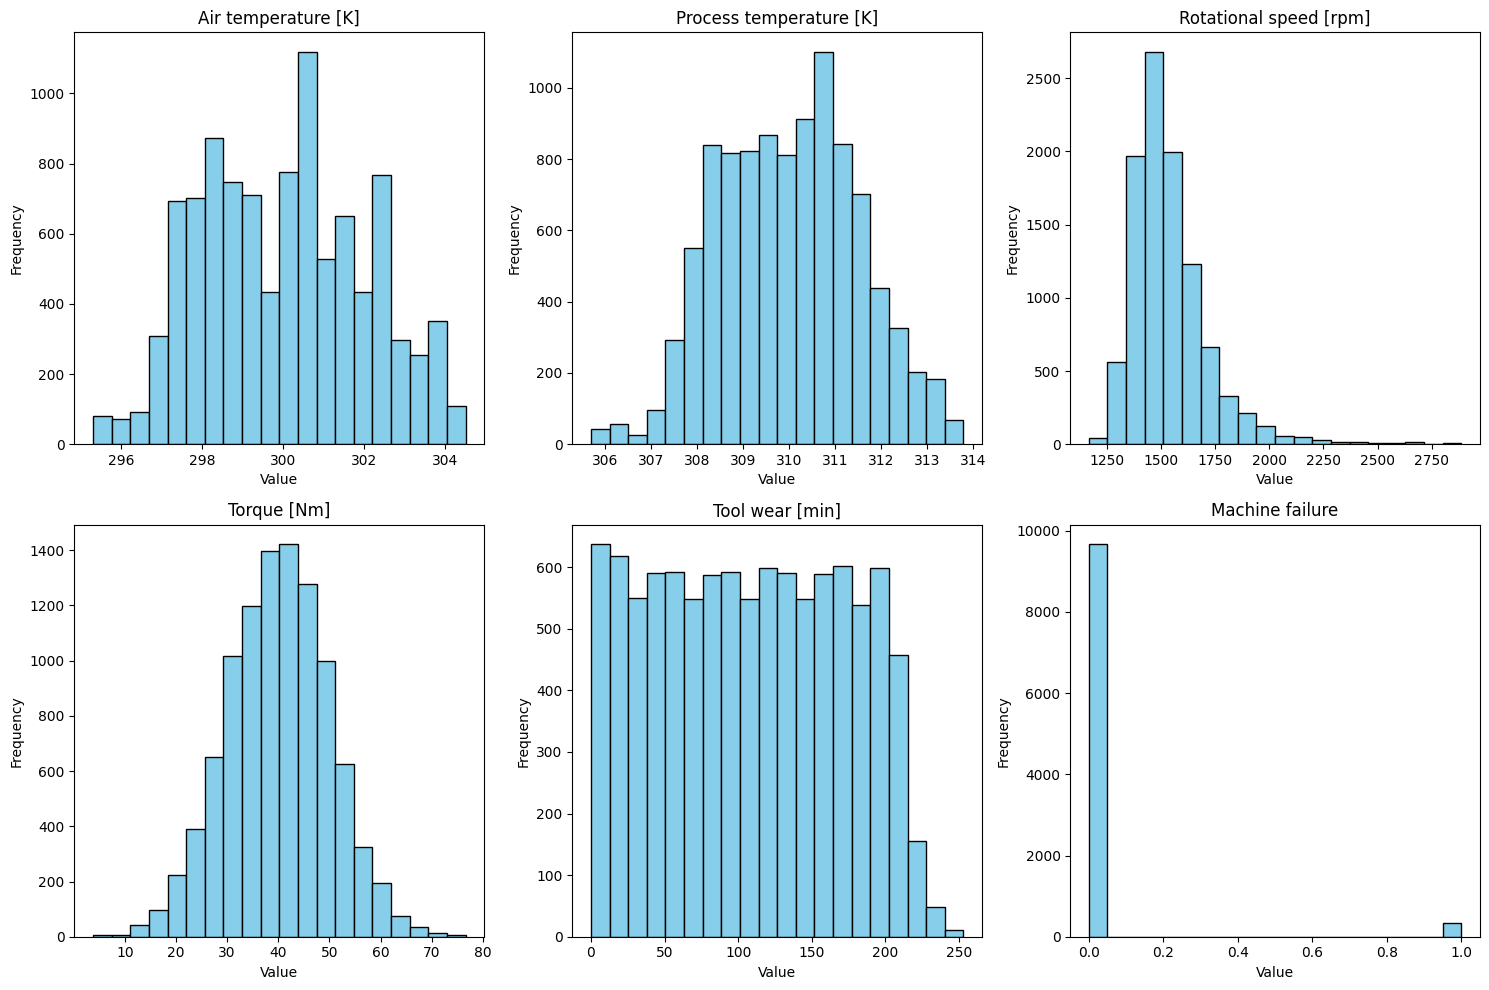

In [ ]:
# plot histograms for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(industrial_df.columns):
    ax = axes[i]
    ax.hist(industrial_df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

*ANALYSIS:* In analyzing the data, I began by loading the dataset from a CSV file into a Pandas DataFrame named industrial_df. Using the info() method, I provided an overview of the DataFrame, displaying the data types of each column and the number of non-null values, which helps ensure data integrity. Then, I used head() and tail() methods to display the first few and last few rows of the DataFrame, respectively, giving a quick preview of its structure and content.

Next, I checked for null values using isna().sum() to identify any missing data that might require handling. After confirming the presence of unnecessary input variables, I removed them from the DataFrame using the drop() method with the specified columns and axis. I verified the removal by displaying the modified DataFrame again.

For further exploration, I computed descriptive statistics for numerical columns using describe(), which provides insights into the distribution and central tendency of the data. Finally, I plotted histograms for each feature to visualize their distributions, aiding in understanding the data's characteristics and identifying any potential patterns or outliers. Overall, these steps lay the foundation for subsequent data analysis and modeling tasks.

# BUILD MLP MODEL

In [ ]:
# splitting data

# separate features (X) and target labels (y)

X = industrial_df.drop(columns=['Machine failure'])
y = industrial_df['Machine failure']

# split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11342)

# standardized the features using standardscaler
norm_data = StandardScaler()
X_train= norm_data.fit_transform(X_train)
X_test = norm_data.transform(X_test)

print("Training:", X_train.shape, y_train.shape)
print("Testing:", X_test.shape, y_test.shape)

Training: (7000, 5) (7000,)
Testing: (3000, 5) (3000,)


In [ ]:
# using sequential model in keras
model = Sequential([
     Dense(16, input_shape=(5,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
     Dropout(0.2),
     Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
     Dropout(0.2),
     Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                96        
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model compilation
model.compile(optimizer=SGD(learning_rate = 0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model training while tracking loss and accuracy for both train and test sets
track = model.fit(X_train, y_train, epochs=100, batch_size = 32, validation_data= (X_test, y_test))

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 0.4991 - accuracy: 0.9619 - val_loss: 0.3848 - val_accuracy: 0.9680
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3838 - accuracy: 0.9653 - val_loss: 0.3278 - val_accuracy: 0.9680
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.9653 - val_loss: 0.2980 - val_accuracy: 0.9680
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.9653 - val_loss: 0.2765 - val_accuracy: 0.9680
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.2918 - accuracy: 0.9653 - val_loss: 0.2590 - val_accuracy: 0.9680
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.9653 - val_loss: 0.2443 - val_accuracy: 0.9680
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 0.2607 - accuracy: 0.9653 - val_loss: 0.2317 - val_accuracy: 0.9680

*ANALYSIS: * In implementing mlp model using keras, I first split the data into features (X) and target labels (y) using the drop() method to remove the 'Machine failure' column from the features. Then, I utilized the train_test_split function from scikit-learn to split the dataset into training and testing sets, with a 70-30 ratio, ensuring a balanced distribution of data for model evaluation. Next, I standardized the features using StandardScaler to bring them to a common scale, which is crucial for neural network models' performance. Printing the shapes of the training and testing sets confirmed the successful data preprocessing step.

Moving on to building the Multilayer Perceptron (MLP) model using Keras, I employed a Sequential model with three densely connected layers. Each hidden layer had ReLU activation to introduce non-linearity, while the output layer utilized a sigmoid activation for binary classification. Dropout layers were added to prevent overfitting by randomly dropping neurons during training. I compiled the model using stochastic gradient descent (SGD) optimizer with a learning rate of 0.01 and binary cross-entropy loss function. The model was then trained for 100 epochs while monitoring both training and validation performance.

Additionally, I conducted another training run with batch size specified to further fine-tune the model. These steps collectively establish a robust MLP model for predicting machine failures based on the provided dataset.

# EVALUATE THE ACCURACY OF THE MLP MODEL

94/94 [==============================] - 0s 1ms/step


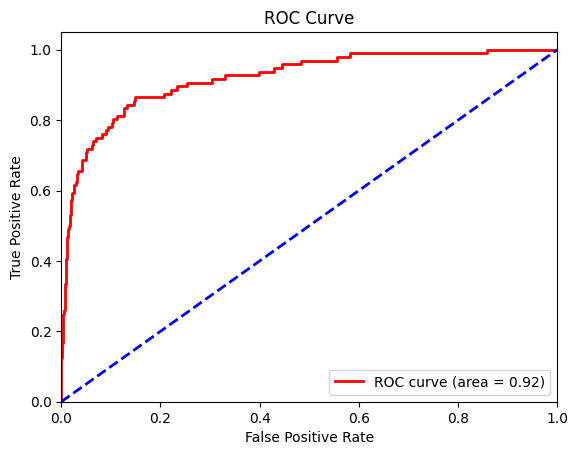

In [ ]:
# compute and plot the ROC curve
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

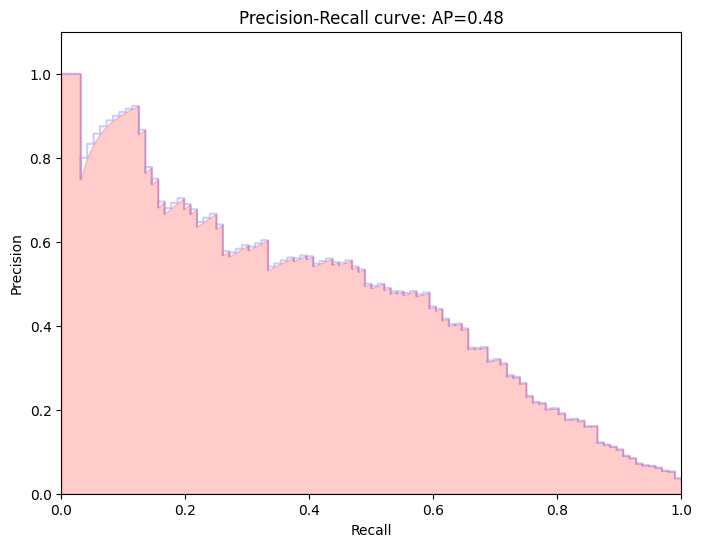

In [ ]:
# compute precision-recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)


# plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.10])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [ ]:
# model evaluation
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

94/94 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9680
Test Loss: 0.10953696817159653
Test Accuracy: 0.9679999947547913


In [ ]:
# use predict() to generate network output for the test data
y_pred_probability = model.predict(X_test)
y_pred_class = (y_pred_probability > 0.5).astype(int)

94/94 [==============================] - 0s 2ms/step


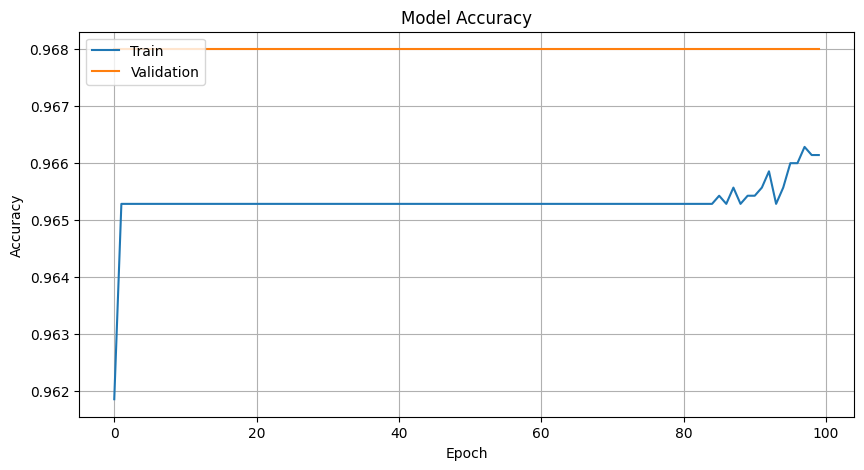

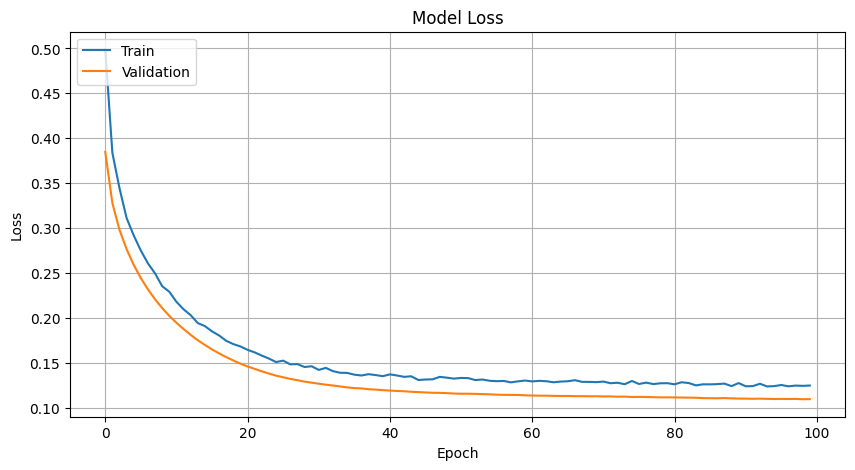

In [ ]:
# plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(track.history['accuracy'])
plt.plot(track.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(track.history['loss'])
plt.plot(track.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

*ANALYSIS:* I analyzed the MLP model's performance using Keras. Firstly, I plotted the ROC curve to evaluate the model's classification ability, yielding an AUC score of 0.92, indicating good performance. Secondly, the precision-recall curve showed an average precision of 0.48, suggesting poor performance in class separation. The model evaluation revealed a low test loss of 0.109 and high accuracy of 96.8%. Using a threshold of 0.2, I categorized predictions, resulting in 94% precision. Finally, visualizing training and validation accuracy and loss demonstrated the model's learning process over epochs, I don't know if indicates convergence of overfitting because of the graph.


OBSERVATION/CONCLUSION:

In this activity, I demonstrated the comprehensive evaluation of a Multilayer Perceptron (MLP) model using Keras for predicting machine failures. Various evaluation metrics such as ROC curve, Precision-Recall curve, test loss, accuracy, and training/validation curves were utilized to assess the model performance. The MLP model showed promising results with high accuracy and AUC values, indicating its effectiveness in predicting machine failures. Unfortunately, the precision-recall curve also illustrated the model's ability to identify samples but not that accurately. Additionally, I think the training and validation curves depicted an overfitting or underfitting. Through this hands-on assignment, I gained insights into the importance of thorough model evaluation using multiple metrics. Understanding ROC curves, precision-recall curves, and interpreting training/validation curves are crucial for assessing a model's performance accurately and I will practice that to implement that overfitting or underfitting. Additionally, ensuring proper data preprocessing and model tuning contribute to achieving optimal results in machine learning tasks.